### Write python ccode for designing FIR filter for low pass, high pass, band pass and band stop filter assume cut-off frequency for low pass and high pass to be 200Hz, for band pass and band stop is 200Hz to 400Hz

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

### Set Parameters 

In [15]:
# Sampling frequency
fs = 2000  # Hz

# Cutoff frequencies
low_cutoff = 200  # Hz
high_cutoff = 400  # Hz

# Number of filter taps (higher = sharper filter)
numtaps = 101

### Design low pass,high pass,band pass,band stop FIR Filter

In [16]:
# Lowpass filter
lowpass = firwin(numtaps, low_cutoff, fs=fs, pass_zero='lowpass')

# Highpass filter
highpass = firwin(numtaps, low_cutoff, fs=fs, pass_zero='highpass')

# Bandpass filter
bandpass = firwin(numtaps, [low_cutoff, high_cutoff], fs=fs, pass_zero=False)

# Bandstop filter
bandstop = firwin(numtaps, [low_cutoff, high_cutoff], fs=fs, pass_zero=True)


### Plot Frequency Response

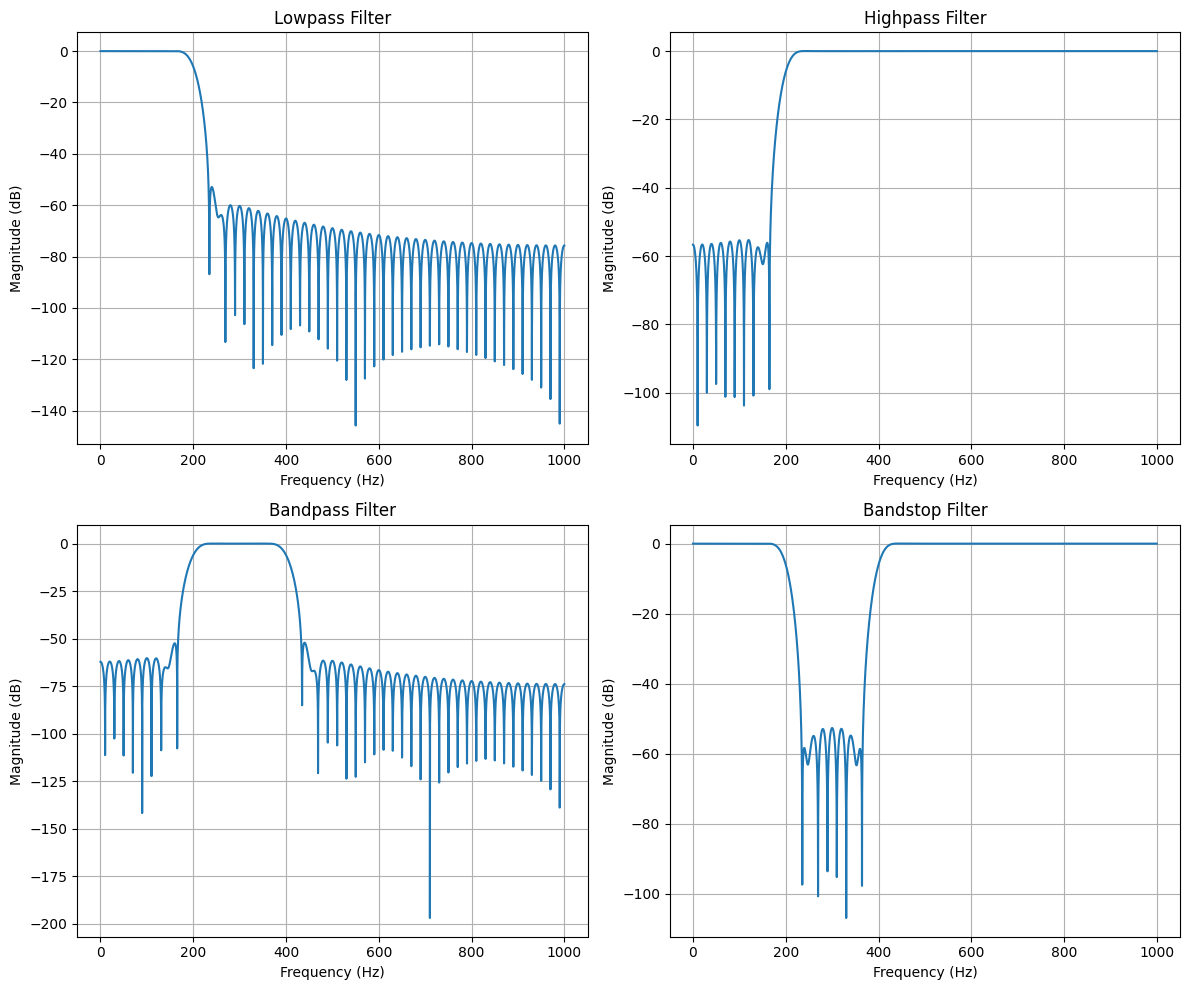

In [17]:
filters = {
    "Lowpass Filter": lowpass,
    "Highpass Filter": highpass,
    "Bandpass Filter": bandpass,
    "Bandstop Filter": bandstop
}

plt.figure(figsize=(12,10))
for i, (title, coeffs) in enumerate(filters.items(), 1):
    w, h = freqz(coeffs, worN=8000)
    plt.subplot(2, 2, i)
    plt.plot((w / np.pi) * (fs / 2), 20 * np.log10(abs(h)))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)

plt.tight_layout()
plt.show()